In [2]:
import pandas as pd
import os

## Merging all months files in a single .csv file

In [3]:
dataset_dir = "/home/pedro/Documents/Data Science/keith-galli-real-world-sales/sales_dataset"

files_list = os.listdir(dataset_dir)

df = pd.DataFrame()

for file in files_list:

    file_dir = dataset_dir + "/" + file
    df_month = pd.read_csv(file_dir)
    df = pd.concat([df, df_month], ignore_index=True)

df.to_csv('sales_2019.csv', index=False)

## Importing 2019 complete .csv sales files

In [4]:
df = pd.read_csv("sales_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"


## Removing nan values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [6]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
shape_before = df.shape
df = df.dropna()
shape_after = df.shape

n_removed_rows = shape_before[0] - shape_after[0]

print("Number of rows before dropna: ",shape_before[0])
print("Number of rows after dropna: ",shape_after[0])
print("Removed rows: ", n_removed_rows)

Number of rows before dropna:  186850
Number of rows after dropna:  186305
Removed rows:  545


In [8]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

## Adding a month column

In [9]:
from datetime import datetime

df['Month'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M', errors='coerce').dt.month
df['Month'].isna().sum()

355

We can see that there are some remaining nan values. I think that there were some values that was not in the correct format before transforming it to datetime. So when I transformed to datetime, these values turned into NaN value.

### Removing the remaining NaN values

In [10]:
df_rows_before = df.shape[0]

df = df.dropna()

df_rows_after = df.shape[0]

print("Number of rows droped: ", df_rows_before - df_rows_after)

Number of rows droped:  355


In [11]:
df['Month'] = df['Month'].astype('int')

## Creating a Sales Column

In [12]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7


In [13]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int')
df['Price Each'] = df['Price Each'].astype('float64')

print(df['Quantity Ordered'].dtype)
print(df['Price Each'].dtype)

df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head(10)

int64
float64


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95
5,222915,Bose SoundSport Headphones,1,99.99,07/03/19 18:30,"899 Elm St, San Francisco, CA 94016",7,99.99
6,222916,Google Phone,1,600.00,07/21/19 22:39,"745 Chestnut St, New York City, NY 10001",7,600.00
7,222917,LG Dryer,1,600.00,07/17/19 13:44,"490 Adams St, New York City, NY 10001",7,600.00
8,222918,USB-C Charging Cable,1,11.95,07/14/19 21:16,"207 1st St, Los Angeles, CA 90001",7,11.95
9,222919,Lightning Charging Cable,1,14.95,07/14/19 13:24,"29 Jefferson St, Dallas, TX 75001",7,14.95


## Question 1. What was the best month for sales?

In [14]:
df_month_group = df.groupby(df['Month']).sum()
df_month_group['Sales']
#print(df_month_group[df_month_group['Sales'] == df_month_group['Sales'].max()]['Month'].values)

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

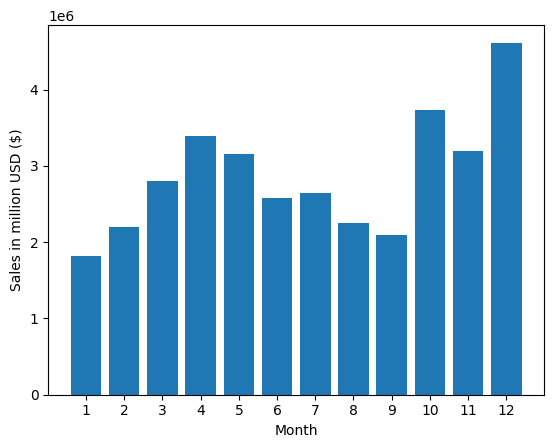

In [15]:
import matplotlib.pyplot as plt

months = range(1, 13)
plt.bar(months, df_month_group['Sales'])
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in million USD ($)')

plt.show()

## Question 2. What city sold the most product?

In [16]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])
df['State'] = df['Purchase Address'].apply(lambda x: x.split(',')[2])
df['State'] = df['State'].apply(lambda x: x.split(' ')[1])
df['City'] = df['City'] + ' (' + df['State'] + ')'

df_city = df.groupby('City').sum()

df_city['Quantity Ordered'].head(15)

City
Atlanta (GA)          16602
Austin (TX)           11153
Boston (MA)           22528
Dallas (TX)           16730
Los Angeles (CA)      33289
New York City (NY)    27932
Portland (ME)          2750
Portland (OR)         11303
San Francisco (CA)    50239
Seattle (WA)          16553
Name: Quantity Ordered, dtype: int64

Text(0, 0.5, 'Quantity Ordered per city')

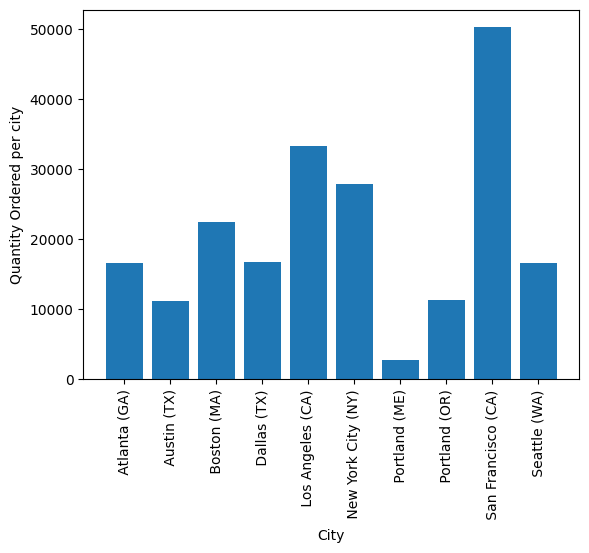

In [17]:
plt.bar(df_city.index, df_city['Quantity Ordered'])
plt.xticks(rotation='vertical')
plt.xlabel('City')
plt.ylabel('Quantity Ordered per city')

## Question 3. What time should we display advertisements to maximize the likelihood of purchases?

/tmp/ipykernel_133376/1106355747.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour


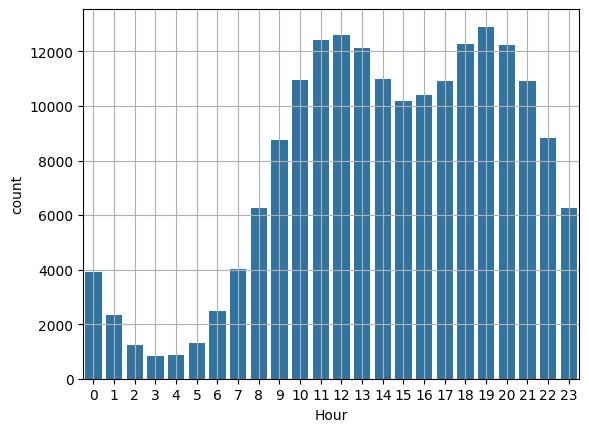

In [20]:
import seaborn as sns

df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
sns.countplot(data=df, x='Hour')
plt.grid()
plt.show()

We should display advertisements at 11 or at 18. 

In [19]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta (GA),GA,16
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,Seattle (WA),WA,8
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta (GA),GA,12
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta (GA),GA,10
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle (WA),WA,2


## Question 4. What products are often sold the most? Why do you think it did?

In [25]:
df['Product'].value_counts()

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

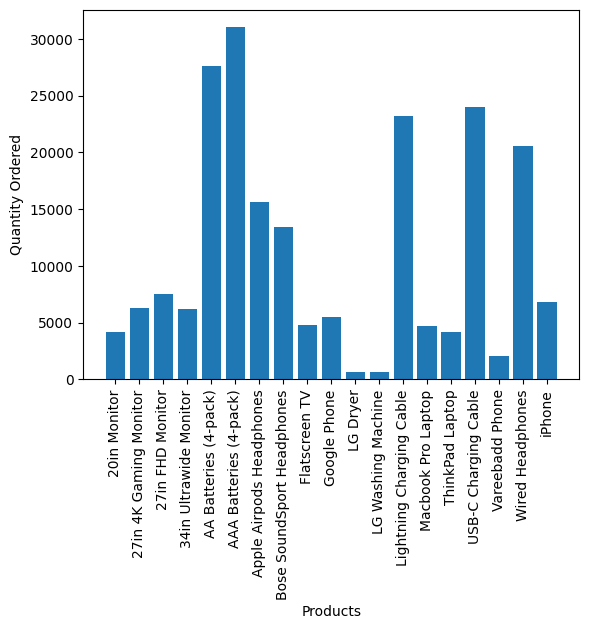

In [27]:
df_product = df.groupby('Product').sum()
plt.bar(df_product.index, df_product['Quantity Ordered'])
plt.xticks(rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.show()

AAA Batteries (4-pack), AA Batteries (4-pack), USB-C Charging Cable, Lightning Charging Cabl and Wirede Headphones are the most sold products. I think it happens, because these itens are cheap.